In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from backend.geotools.path_calc import address_search



In [7]:
from backend.geotools.path_calc import address_search

lat, lng = [45.147762, -93.134160]
address_data = address_search(lng, lat, 5000.)

In [8]:
from functools import reduce
# reduceaddress_data["USECLASS1"].unique()
use_classes = list(reduce(lambda a, b: a + b, [address_data[f"USECLASS{i}"].unique().tolist() for i in range(1,5)]))
set(use_classes)

{'AGRICULTURAL',
 'APARTMENTS / COOP',
 'COMMERCIAL / GOLF COURSE',
 'CONDOMINIUMS',
 'DOUBLE BUNGALOWS',
 'INDUSTRIAL',
 'MANUFACTURED HOME PARK',
 None,
 'RESIDENTIAL DUPLEXES',
 'RESIDENTIAL SINGLE FAMILY',
 'SEASONAL RECREATIONAL',
 'TAX FORFEIT',
 'UTILITY PROPERTY'}

In [13]:
{None: "d"}

{None: 'd'}

In [17]:
class_weights = {
    'AGRICULTURAL': 0.5,
    'APARTMENTS / COOP': 10,
    'COMMERCIAL / GOLF COURSE': 1,
    'CONDOMINIUMS': 5,
    'DOUBLE BUNGALOWS': 3,
    'INDUSTRIAL': 3,
    'MANUFACTURED HOME PARK': 10,
     None: 0,
    'RESIDENTIAL DUPLEXES': 3,
    'RESIDENTIAL SINGLE FAMILY': 2,
    'SEASONAL RECREATIONAL': 1,
    'TAX FORFEIT': 0,
    'UTILITY PROPERTY': 0
}

In [16]:
pd.unique(address_data["USECLASS1"])

array(['AGRICULTURAL', 'RESIDENTIAL SINGLE FAMILY',
       'COMMERCIAL / GOLF COURSE', 'TAX FORFEIT', 'RESIDENTIAL DUPLEXES',
       'MANUFACTURED HOME PARK', 'APARTMENTS / COOP', 'CONDOMINIUMS',
       'UTILITY PROPERTY', 'INDUSTRIAL'], dtype=object)

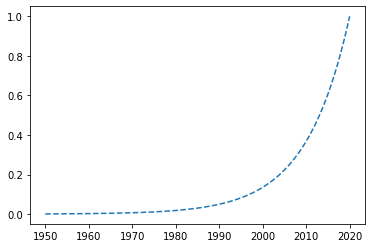

In [25]:
x = np.linspace(1950, 2020, 1000)
year_weights = lambda x: np.exp((x - 2020) / 10)
fig, ax = plt.subplots()
ax.plot(x, year_weights(x), "--")
plt.show()

In [33]:
def weighting_function(df):
    use_weight = df["USECLASS1"].map(class_weights)
    return use_weight * year_weights(df["YEAR_BUILT"])

In [36]:
address_data["WEIGHT"] = weighting_function(address_data)

         COUNTY_PIN           STATE_PIN ANUMBERPRE  ANUMBER ANUMBERSUF  \
0      363123440053  27003-363123440053       None        0       None   
1      363123440052  27003-363123440052       None        0       None   
2      363123440051  27003-363123440051       None      110       None   
3      363123440050  27003-363123440050       None      108       None   
4      363123440049  27003-363123440049       None      106       None   
...             ...                 ...        ...      ...        ...   
10879  073122140006  27003-073122140006       None      379       None   
10880  073122140003  27003-073122140003       None     7861       None   
10881  073122140002  27003-073122140002       None     7865       None   
10882  073122140001  27003-073122140001       None      345       None   
10883  073122130001  27003-073122130001       None        0       None   

      ST_PRE_MOD ST_PRE_DIR ST_PRE_TYP ST_PRE_SEP       ST_NAME  ... SECTION  \
0           None       None    

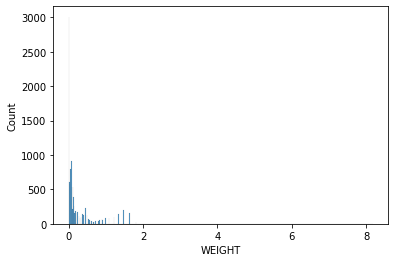

In [37]:
sns.histplot(address_data["WEIGHT"])

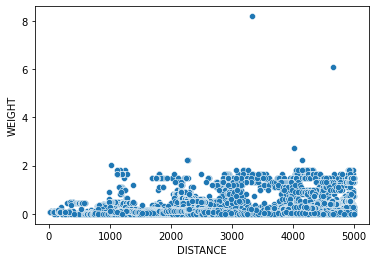

In [38]:
sns.scatterplot(y="WEIGHT", x="DISTANCE", data=address_data)

In [9]:
address_data["WEIGHT"] = address_data["USECLASS1"].apply(lambda x: class_weights[x]) *


Index(['COUNTY_PIN', 'STATE_PIN', 'ANUMBERPRE', 'ANUMBER', 'ANUMBERSUF',
       'ST_PRE_MOD', 'ST_PRE_DIR', 'ST_PRE_TYP', 'ST_PRE_SEP', 'ST_NAME',
       'ST_POS_TYP', 'ST_POS_DIR', 'ST_POS_MOD', 'SUB_TYPE1', 'SUB_ID1',
       'SUB_TYPE2', 'SUB_ID2', 'ZIP', 'ZIP4', 'CTU_NAME', 'CTU_ID_TXT',
       'POSTCOMM', 'CO_CODE', 'CO_NAME', 'STATE_CODE', 'LOT', 'BLOCK',
       'PLAT_NAME', 'OWNER_NAME', 'OWNER_MORE', 'OWN_ADD_L1', 'OWN_ADD_L2',
       'OWN_ADD_L3', 'OWN_ADD_L4', 'TAX_NAME', 'TAX_ADD_L1', 'TAX_ADD_L2',
       'TAX_ADD_L3', 'TAX_ADD_L4', 'LANDMARK', 'HOMESTEAD', 'ACRES_POLY',
       'ACRES_DEED', 'EMV_LAND', 'EMV_BLDG', 'EMV_TOTAL', 'TAX_YEAR',
       'MKT_YEAR', 'TAX_CAPAC', 'TOTAL_TAX', 'SPEC_ASSES', 'USECLASS1',
       'USECLASS2', 'USECLASS3', 'USECLASS4', 'MULTI_USES', 'TAX_EXEMPT',
       'XUSECLASS1', 'XUSECLASS2', 'XUSECLASS3', 'XUSECLASS4', 'DWELL_TYPE',
       'HOME_STYLE', 'FIN_SQ_FT', 'GARAGE', 'GARAGESQFT', 'BASEMENT',
       'HEATING', 'COOLING', 'YEAR_BUILT', 'NUM_U

In [11]:
np.unique(address_data["YEAR_BUILT"])

array([   0, 1882, 1886, 1890, 1892, 1894, 1900, 1901, 1902, 1904, 1910,
       1912, 1913, 1914, 1917, 1920, 1924, 1925, 1928, 1929, 1930, 1932,
       1934, 1935, 1936, 1938, 1939, 1940, 1941, 1942, 1943, 1945, 1946,
       1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019])

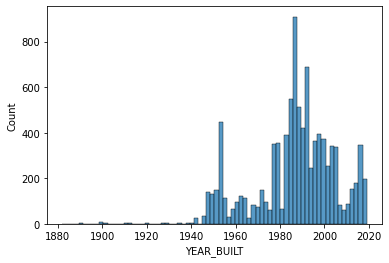

In [12]:
new_mask = address_data["YEAR_BUILT"] > 0
sns.histplot(address_data.loc[new_mask, "YEAR_BUILT"])